# Final Project in Machine Learning for BioRobitics
The final project in Machine Learning for BioRobotics focuses on the implementation of a research article titled "Diagnosis of Breast Cancer Using Random Forests" by Manas Minnoor and Veeky Baths
## Team members:
Name| Section |
--- | --- |
[Abdelrahman Sameh]() | 1
[Osamah Faisal](https://github.com/osamahfaisal) | 1
[Shuaib Abdulsalam](https://github.com/ShuaibSaleh) | 1
[Mariam Mounier](https://github.com/MariamMounier) | 2
[Mina Azer](https://github.com/MInaAzer01) | 2
[Yehia Said](https://github.com/YehiaSAhmed/) | 2

In [1]:
# Importing the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 4. Dataset Description and Preprocessing

In [2]:
# Load the dataset using fetch_ucirepo function and assign the features and targets to X and y respectively
dataset = fetch_ucirepo(id=17)
X, y = dataset.data.features, dataset.data.targets # Here ID column is dropped

# Print the metadata of the dataset
print(dataset.metadata)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

The dataset consists of 569 tumor instances, each with 30 features. The target variable is the diagnosis column, and all instances have complete data with no missing values

In [3]:
# Print the variable information of the dataset
print(dataset.variables)

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

In [4]:
# Concatenate the target variable and the features into a single DataFrame and display it
original_data = pd.concat([y, X], axis=1)
original_data

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


,Diagnosis_M,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


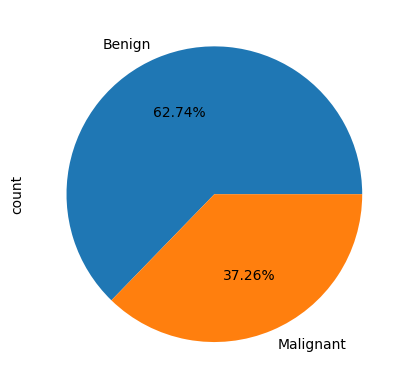

In [5]:
# Encode the target variable (y) using one-hot encoding
y_encoded = pd.get_dummies(y, drop_first=True, dtype=int)

# Create a pie chart to visualize the distribution of the target variable
y_encoded.value_counts().plot(kind='pie', labels=['Benign', 'Malignant'], autopct='%1.2f%%')

modified_data = pd.concat([y_encoded,X], axis=1)
modified_data

This pie chart shows that the positive (malignant) class accounts for less than 40% of the instances. So upsampling is done to overcome that.

In [6]:
def upsampling(X, y):
    # Get the major and minor values
    major_value = y.value_counts().idxmax()
    minor_value = y.value_counts().idxmin()

    # Create a DataFrame with features and encoded target variable
    data = pd.concat([X, y], axis=1)

    # Separate the major and minor class samples
    major_class = data[data["Diagnosis_M"] == major_value]
    minor_class = data[data["Diagnosis_M"] == minor_value]

    # Upsample the minority class
    minor_upsampled = resample(minor_class, replace=True, n_samples=len(major_class), random_state=42)

    # Combine the upsampled minority class samples with the majority class samples
    data_equal = pd.concat([major_class, minor_upsampled])
    data_equal.reset_index(drop=True, inplace=True)

    return data_equal.drop("Diagnosis_M",axis=1), data_equal["Diagnosis_M"]

X_sampled, y_sampled = upsampling(X.round(4),y_encoded)

<Axes: ylabel='count'>

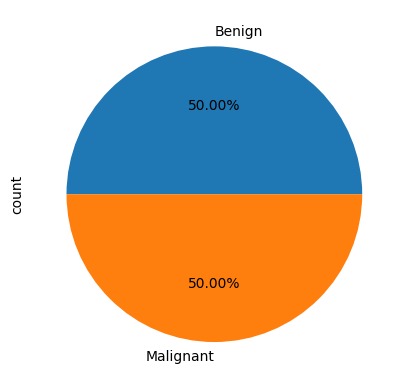

In [7]:
# Create a pie chart to visualize the distribution of the upsampled target variable
y_sampled.value_counts().plot(kind='pie', labels=['Benign', 'Malignant'], autopct='%1.2f%%')

Now the dataset become 50%-50%. As the features have wide varying range, performing normalization is essential.

In [8]:
def normalization(X):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns)
    return X_scaled_df

X_normalized = normalization(X_sampled)
preprocessed_data = pd.concat([y_sampled,X_normalized],axis=1)

In [9]:
# Split the scaled features and the target variable into training and test sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_sampled, test_size=0.2, random_state=42)

# 5. Feature Selection

## 5.1 Initial Feature Selection
The initial stage of feature selection is based on the Pearson correlation coefficient. For pairs of features having a correlation coefficient higher than 0.8, one of the features is dropped to avoid multicollinearity.

<Axes: >

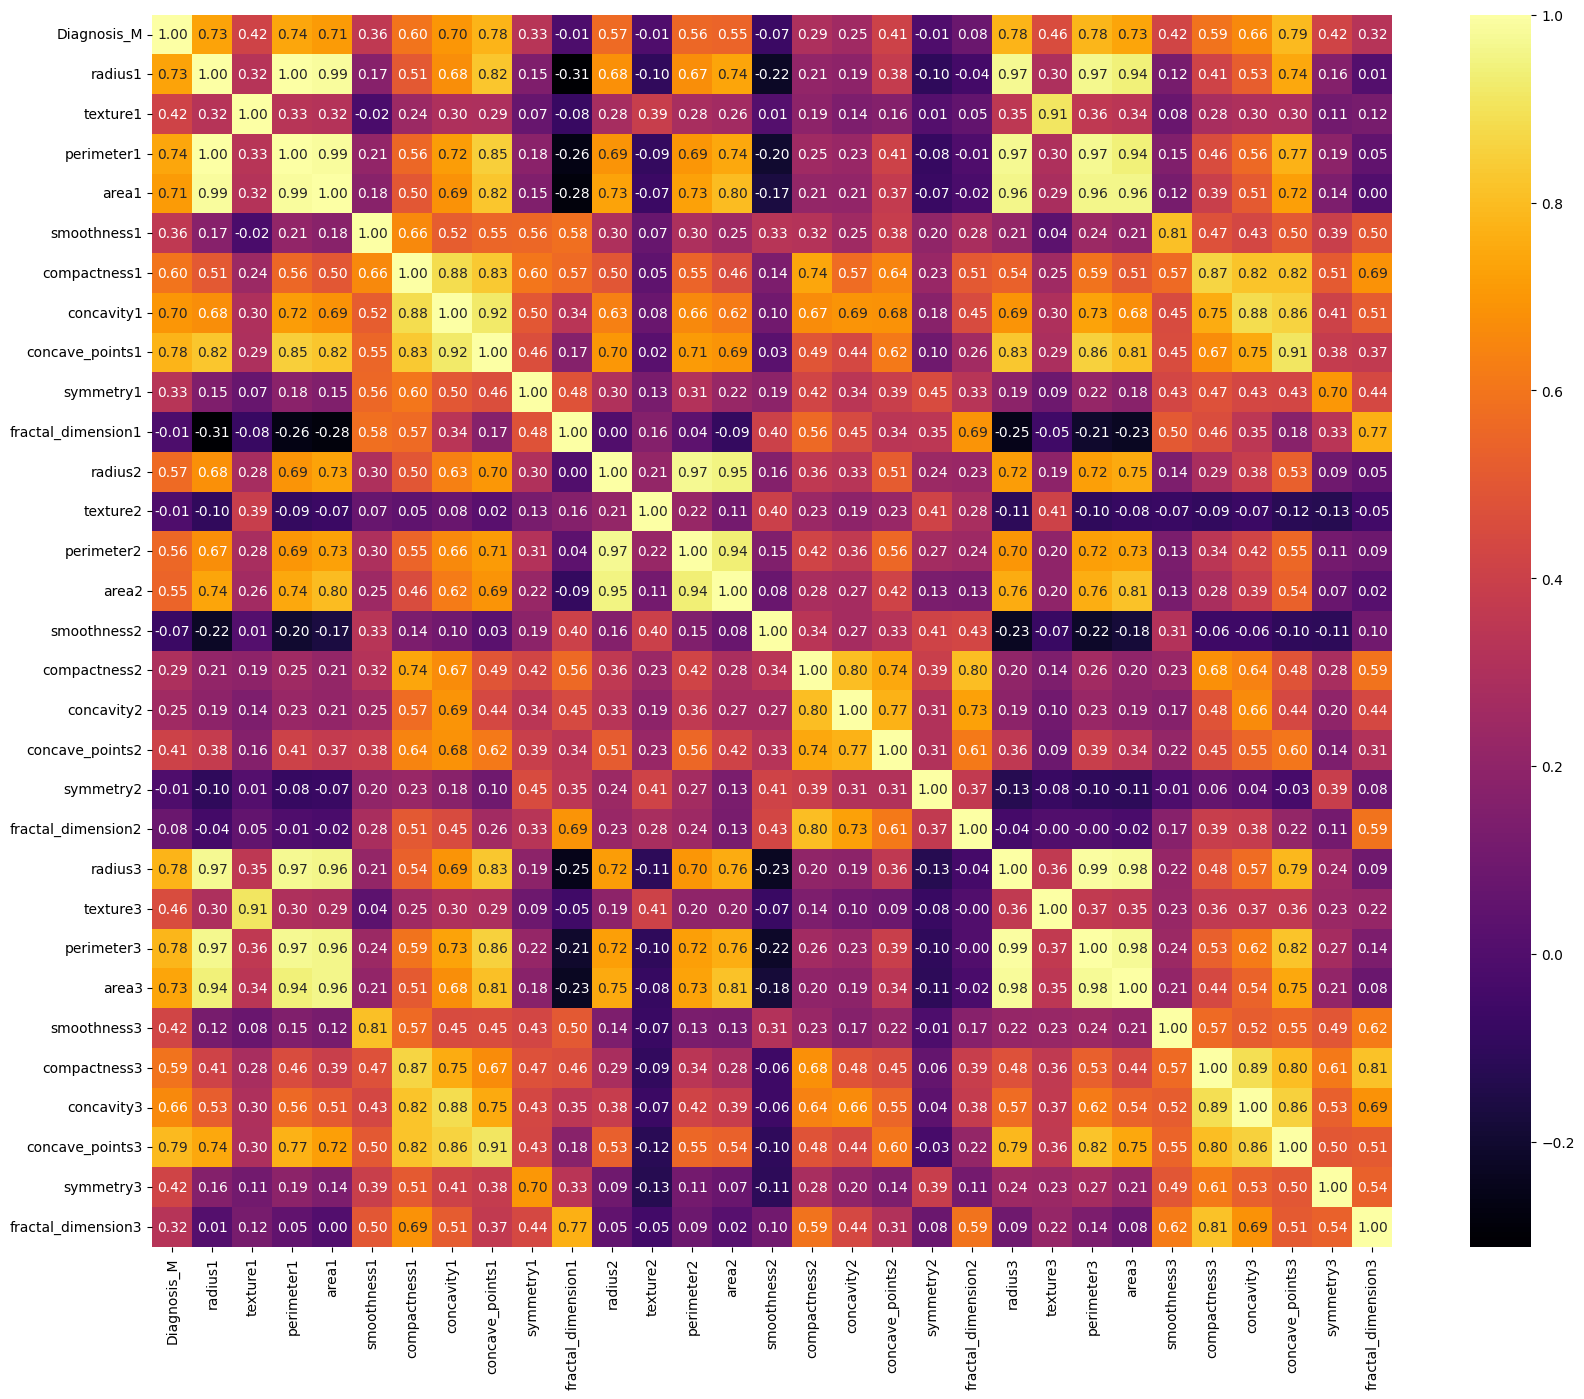

In [10]:
def checker(x, y):
    # Count the number of elements in x that are also present in y
    return sum(1 for item in x if item in y)

def initial_feature_selection(X, threshold):
    # Calculate the correlation matrix of the input DataFrame X
    corr_matrix = X.corr()

    # Create an upper triangular matrix by masking the lower triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape, dtype=bool), k=1))

    # Identify columns where any value in the upper triangular matrix is greater than or equal to the threshold
    to_drop = [column for column in upper.columns if any(upper[column] >= threshold)]

    # Drop the columns specified in to_drop from the original DataFrame X
    features = X.drop(columns=to_drop)

    # Return the resulting DataFrame with selected features
    return features

# Create a figure with a specified size and plot the heatmap of the correlation matrix of the modified_data
plt.figure(figsize=(20, 16))
corr = modified_data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="inferno")

In [11]:
paper_initial_feature_selection = [
    "texture1", "area1", "smoothness1", "concavity1", 
    "symmetry1", "fractal_dimension1", "texture2", "area2", 
    "smoothness2", "concavity2", "symmetry2", "fractal_dimension2", 
    "smoothness3", "compactness3", "symmetry3", "fractal_dimension3"
    ] # this is the feature resulting from the initial feature selection in the paper

mod_init_feature_selection = initial_feature_selection(modified_data,0.8) # this is the initial feature selection of the 
# modified data

print(checker(paper_initial_feature_selection,mod_init_feature_selection), mod_init_feature_selection.columns)

8 Index(['Diagnosis_M', 'radius1', 'texture1', 'smoothness1', 'compactness1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'smoothness2',
       'compactness2', 'concave_points2', 'symmetry2', 'symmetry3'],
      dtype='object')


In [12]:
preprocessed_init_feature_selection = initial_feature_selection(preprocessed_data,0.8)

print(checker(paper_initial_feature_selection,preprocessed_init_feature_selection), preprocessed_init_feature_selection.columns)

11 Index(['Diagnosis_M', 'radius1', 'texture1', 'smoothness1', 'compactness1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'smoothness2',
       'compactness2', 'concave_points2', 'symmetry2', 'fractal_dimension2',
       'smoothness3', 'symmetry3', 'fractal_dimension3'],
      dtype='object')


Here is shown the difference between the paper's initial feature selection, the modified data's initial feature selection, and the preprocessed data's initial feature selection, so we choose the better initial feature selection made which is the preprocessed data's inital feature selection

## 5.2 Further Feature Selection
The second stage of feature selection is based on three different methods:
- Recursive Feature Elimination.
- Logistic Regression.
- Univariate Selection.

In [13]:
from sklearn.feature_selection import RFE, f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier


your_data = preprocessed_init_feature_selection

# Separate features and target variable
X = your_data.drop('Diagnosis_M', axis=1)  
y = your_data['Diagnosis_M']

# Standardize the features (optional but can be helpful for certain methods)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Method 1: Recursive Feature Elimination (RFE) with Extra Trees classifier
extra_trees_estimator = ExtraTreesClassifier(n_estimators=100)  # You can adjust the parameters as needed
rfe = RFE(extra_trees_estimator, n_features_to_select=8)  # Choose the number of features to select
rfe.fit(X_scaled, y)

# Selected features using RFE with Extra Trees classifier
selected_features_rfe = X.columns[rfe.support_]

# Print the selected features using RFE with Extra Trees classifier
print("Selected features using RFE with Extra Trees classifier:")
print(selected_features_rfe)

Selected features using RFE with Extra Trees classifier:
Index(['radius1', 'texture1', 'compactness1', 'fractal_dimension1', 'radius2',
       'concave_points2', 'smoothness3', 'symmetry3'],
      dtype='object')


In [15]:
# Method 2: Logistic Regression for feature importance
logreg = LogisticRegression()
logreg.fit(X_scaled, y)

# Select features with the highest importance
model = SelectFromModel(logreg, prefit=True, max_features=8)
X_selected = model.transform(X_scaled)

# Get the selected features
selected_features_indices = model.get_support()
selected_features_logreg = X.columns[selected_features_indices]

# Print the selected features using Logistic Regression
print("Selected features using Logistic Regression:")
print(selected_features_logreg)

Selected features using Logistic Regression:
Index(['radius1', 'texture1', 'fractal_dimension1', 'radius2',
       'concave_points2', 'fractal_dimension2', 'smoothness3',
       'fractal_dimension3'],
      dtype='object')


In [16]:

# Method 3: Univariate Selection with ANOVA F-value
k_best = SelectKBest(score_func=f_classif, k=8)  # Choose the number of features to select
X_selected = k_best.fit_transform(X_scaled, y)

# Get the selected features
selected_features_indices = k_best.get_support()
selected_features_anova = X.columns[selected_features_indices]

# Print the selected features using Univariate Selection with ANOVA F-value
print("Selected features using Univariate Selection with ANOVA F-value:")
print(selected_features_anova)

Selected features using Univariate Selection with ANOVA F-value:
Index(['radius1', 'texture1', 'smoothness1', 'compactness1', 'radius2',
       'concave_points2', 'smoothness3', 'symmetry3'],
      dtype='object')


In [17]:
# Combine selected features from all three methods
combined_selected_features_rfe_logreg = set(selected_features_rfe) and set(selected_features_logreg) 
combined_selected_features_rfe_anova = set(selected_features_rfe) and set(selected_features_anova)
combined_selected_features_logreg_anova = set(selected_features_logreg) and set(selected_features_anova)

combined_selected_features = combined_selected_features_rfe_logreg and combined_selected_features_rfe_anova and combined_selected_features_logreg_anova

print("combined_selected_features_rfe_logreg",combined_selected_features_rfe_logreg)
print("combined_selected_features_rfe_anova",combined_selected_features_rfe_anova)
print("combined_selected_features_logreg_anova",combined_selected_features_logreg_anova)
print("\n")
# Print the final minimal dataset features
print("Minimal dataset features:")
print(combined_selected_features)

combined_selected_features_rfe_logreg {'fractal_dimension1', 'radius1', 'texture1', 'smoothness3', 'fractal_dimension3', 'fractal_dimension2', 'concave_points2', 'radius2'}
combined_selected_features_rfe_anova {'radius1', 'texture1', 'smoothness3', 'symmetry3', 'smoothness1', 'radius2', 'concave_points2', 'compactness1'}
combined_selected_features_logreg_anova {'radius1', 'texture1', 'smoothness3', 'symmetry3', 'smoothness1', 'radius2', 'concave_points2', 'compactness1'}


Minimal dataset features:
{'radius1', 'texture1', 'smoothness3', 'symmetry3', 'smoothness1', 'radius2', 'concave_points2', 'compactness1'}
